<a href="https://colab.research.google.com/github/EdVKu/Econophysics_Projects/blob/main/Copia_de__Ej4_CWOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuación de Schäfer & Seligman (2013)

Para una matriz de longitud temporal T, con N elementos l.i., se cumple que $\kappa = T/N,\ \lambda_{\pm} = (1-c)(\kappa^{-1/2}\pm 1)^2$.

Así, se corroborará que para ensambles ortogonales correlacionados de Wishart (CWOE), se cumplen las siguientes relaciones para sus distribuciones de EigenValores $\lambda$:

$$\begin{equation}
  \overline{\rho}(\lambda)=\overline{\rho'}(\lambda) + \delta\left(\lambda - \frac{(Nc + 1 - c)(Nc\kappa+1-c)}{Nc\kappa}\right)
  \tag{1}
\end{equation}
$$

$$\begin{equation}
\overline{\rho'}(\lambda)= \kappa\frac{\sqrt{(\lambda_+ - \lambda)(\lambda-\lambda_-)}}{2\pi(1-c)\lambda}
\tag{2}
\end{equation}$$

Fuente:

Schäfer, R., & Seligman, T. H. (2013). Emerging spectra of singular correlation matrices under small power-map deformations. Physical Review E, 88(3), 032115.

In [ ]:
# Se programarán las ecuaciones 1 y 2

from math import *
import scipy as sp
import numpy as np

c=[0, 0.2, 0.4, 0.8]

N = 50
T = 150


kappa = T/N



sig = sp.signal

def lm(kappa,c ):
  return (1-c)*(kappa**(-1/2) - 1)**2

def lp(kappa,c):
  return (1-c)*(kappa**(-1/2) + 1)**2

def ec2(lmb, kappa, c):

  return kappa*(sqrt(abs((lp(kappa,c)-lmb)*(lmb - lm(kappa,c)))))/(2*pi*(1-c)*lmb)

# de estas solo se usara la ecuación 2 para el ejercicio

In [ ]:
def ec1(lmb, kappa, N, c=0):

  return ec2 + sig.unit_impulse(lmb-((c*(N-1) + 1)(N*(c*kappa-1) + 1))/(N*c*kappa))


In [ ]:
import numpy as np
n=5
np.diag(np.ones(n),0) + (np.ones((n,n))-np.diag(np.ones(n),0))*0.2

array([[1. , 0.2, 0.2, 0.2, 0.2],
       [0.2, 1. , 0.2, 0.2, 0.2],
       [0.2, 0.2, 1. , 0.2, 0.2],
       [0.2, 0.2, 0.2, 1. , 0.2],
       [0.2, 0.2, 0.2, 0.2, 1. ]])

In [ ]:
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
np.random.seed(1300)
def cwoe(n,t,c):
    a = np.random.normal(0,1,(n,t))
    h = np.diag(np.ones(n),0) + (np.ones((n,n))-np.diag(np.ones(n),0))*c
    x = np.matmul(sqrtm(h),a)
    return  1/t*(np.matmul(x,x.T))


def eig(m,n,t,c):
    valores = np.zeros(m*n)
    j = 0
    for i in range(m):
      hmat = cwoe(n,t,c)
      eig = np.linalg.eigvals(hmat)
      for k in range(n):
        valores[j] = eig[k]
        j +=1
    return valores
dg = [eig(50,50,100,c[0]),eig(50,50,100,c[1]),eig(50,50,100,c[2]),eig(50,50,100,c[3])]

# xo = np.linspace()

(array([ 80., 129., 131., 113., 112., 101.,  98.,  89.,  87.,  77.,  83.,
         71.,  78.,  60.,  66.,  59.,  56.,  57.,  63.,  52.,  58.,  44.,
         42.,  45.,  45.,  46.,  41.,  36.,  36.,  33.,  38.,  31.,  26.,
         39.,  38.,  24.,  30.,  17.,  17.,  21.,  25.,  16.,  18.,  19.,
         13.,  15.,  11.,   6.,   5.,   3.]),
 array([0.07340855, 0.13109846, 0.18878837, 0.24647828, 0.30416819,
        0.3618581 , 0.41954801, 0.47723792, 0.53492782, 0.59261773,
        0.65030764, 0.70799755, 0.76568746, 0.82337737, 0.88106728,
        0.93875719, 0.99644709, 1.054137  , 1.11182691, 1.16951682,
        1.22720673, 1.28489664, 1.34258655, 1.40027646, 1.45796637,
        1.51565627, 1.57334618, 1.63103609, 1.688726  , 1.74641591,
        1.80410582, 1.86179573, 1.91948564, 1.97717555, 2.03486545,
        2.09255536, 2.15024527, 2.20793518, 2.26562509, 2.323315  ,
        2.38100491, 2.43869482, 2.49638473, 2.55407463, 2.61176454,
        2.66945445, 2.72714436, 2.78483427, 2.

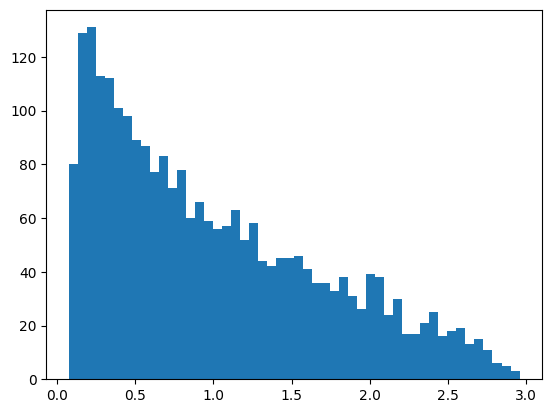

In [ ]:
dg0 = dg[0]
dg1 = dg[1]
dg2 = dg[2]
dg3 = dg[3]
plt.hist(dg0,bins=50,alpha = True)

(array([0.93164232, 0.66332934, 0.49190715, 0.3639616 , 0.28446146,
        0.20496131, 0.09316423, 0.00993752, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00248438, 0.00124219, 0.00621095, 0.00248438,
        0.00496876, 0.00621095, 0.00248438, 0.00248438, 0.00496876,
        0.00248438, 0.00745314, 0.00372657, 0.00496876, 0.00248438,
        0.00124219, 0.00124219, 0.        , 0.        , 0.00248438,
        0.        , 0.        , 0.00124219, 0.        , 0.00124219]),
 array([ 0.05599096,  0.37800295,  0.70001494,  1.02202693,  1.34403892,
         1.66605091,  1.9880629 ,  2.3100749 ,  2.63208689,  2.95409888,
         3.27611087,  3.59812286,  3.92013485,  4.24214684,  4.56415883,
         4.88617083,  5.20818282,  5.53019481,  5.8522068 ,  6.17421879,
         6.49623078,  6.81

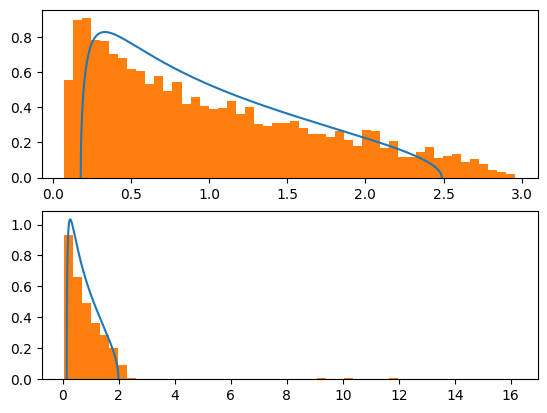

In [ ]:
xo = [np.linspace(lm(kappa,c[i]),lp(kappa,c[i]), 10000) for i in [0,1,2,3]]
yo=[]
y1=[]
y2=[]
y3=[]




for i in xo[0]:
  yo.append(ec2(i,kappa,c[0]))
for i in xo[1]:
  y1.append(ec2(i,kappa,c[1]))
for i in xo[2]:
  y2.append(ec2(i,kappa,c[2]))
for i in xo[3]:
  y3.append(ec2(i,kappa,c[3]))

x0 = xo
fig, ax = plt.subplots(2)
ax[0].plot(x0[0],yo)
#
ax[1].plot(x0[1],y1)
#

ax[0].hist(dg0,density = True, bins=50)
ax[1].hist(dg1,density = True, bins=50)


(array([8.97608213e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.32741399e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.66370699e-04, 7.32741399e-04, 7.32741399e-04, 1.09911210e-03,
        1.46548280e-03, 7.32741399e-04, 1.83185350e-03, 7.32741399e-04,
        1.83185350e-03, 1.09911210e-03, 1.46548280e-03, 1.09911210e-03,
        7.32741399e-04, 7.32741399e-04, 3.66370699e-04, 3.66370699e-04,
        1.09911210e-03, 0.00000000e+00, 3.66370699e-04, 0.00000000e+00,
        0.00000000e+00, 7.32741399e-04]),
 array([1.39714383e-02, 1.10576180e+00, 2.19755217e+00, 3.28934254e+00,
        4.38113290e+00

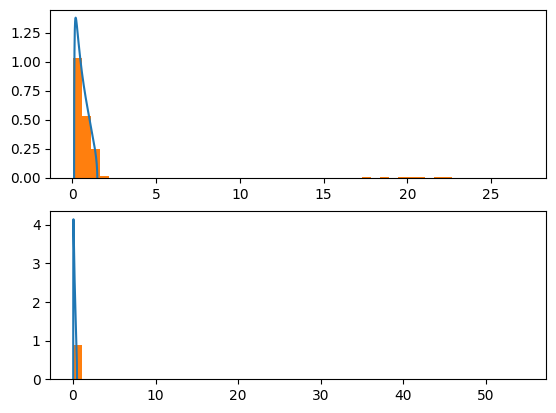

In [ ]:
fig, ax = plt.subplots(2)

ax[0].plot(x0[2],y2)
#
ax[1].plot(x0[3],y3)
#
ax[0].hist(dg2,density = True, bins=50)
ax[1].hist(dg3,density = True, bins=50)

(array([1.79521643e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.46548280e-04, 2.19822420e-04, 1.17238624e-03, 1.24566038e-03,
        6.59467259e-04, 2.19822420e-04]),
 array([1.39714383e-02, 5.47292327e+00, 1.09318751e+01, 1.63908269e+01,
        2.18497788e+01, 2.73087306e+01, 3.27676824e+01, 3.82266343e+01,
        4.36855861e+01, 4.91445379e+01, 5.46034898e+01]),
 <BarContainer object of 10 artists>)

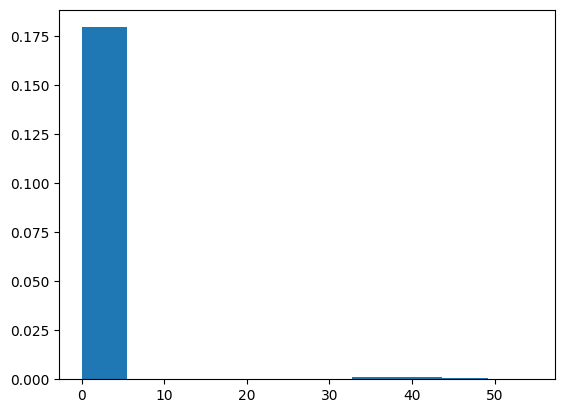

In [ ]:
plt.hist(dg3, density = True)